In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from scipy.stats.mstats import winsorize
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [3]:
# Load Dataset

data = pd.read_csv("Parkinsons_dirty.csv")

# Data Preprocessing 

In [5]:
missing_values = data.isnull().sum()

In [6]:
mask = data.isnull().any(axis=0)
cols_with_nan = data.columns[mask]
data[cols_with_nan]

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),spread1,PPE
0,119.992,157.302,74.997,-4.813031,0.284654
1,error,148.650,113.819,-4.075192,0.368674
2,116.682,131.111,NaN,-4.443179,0.332634
3,116.676,137.871,111.366,-4.117501,0.368975
4,9999,141.781,110.655,-3.747787,0.410335
...,...,...,...,...,...
193,198.764,396.961,74.904,-6.744577,0.123306
194,214.289,260.277,77.973,-5.724056,0.148569
195,119.992,157.302,74.997,-4.813031,0.284654
196,122.4,148.650,113.819,-4.075192,0.368674


In [7]:
mask = data.isnull().any(axis=1)
mask
data_clean = data[~mask]
data_clean


,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,error,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.33559,2.486855,0.368674
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,missing,2.405554,0.368975
4,phon_R01_S01_5,9999,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
5,phon_R01_S01_6,120.552,131.162,113.787,0.00968,0.00008,0.00463,0.00750,0.01388,0.04701,...,0.06985,0.01222,21.378,1,0.415564,0.825069,-4.242867,0.299111,2.187560,-100.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306
194,phon_R01_S50_6,214.289,260.277,77.973,0.00567,0.00003,0.00295,0.00317,0.00885,0.01884,...,0.03078,0.04398,21.209,0,0.462803,0.664357,-5.724056,0.190667,2.555477,0.148569
195,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
196,phon_R01_S01_2,122.4,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.33559,2.486855,0.368674


In [8]:
data.isnull().sum()/len(data)

name                0.000000
MDVP:Fo(Hz)         0.025253
MDVP:Fhi(Hz)        0.025253
MDVP:Flo(Hz)        0.005051
MDVP:Jitter(%)      0.000000
MDVP:Jitter(Abs)    0.000000
MDVP:RAP            0.000000
MDVP:PPQ            0.000000
Jitter:DDP          0.000000
MDVP:Shimmer        0.000000
MDVP:Shimmer(dB)    0.000000
Shimmer:APQ3        0.000000
Shimmer:APQ5        0.000000
MDVP:APQ            0.000000
Shimmer:DDA         0.000000
NHR                 0.000000
HNR                 0.000000
status              0.000000
RPDE                0.000000
DFA                 0.000000
spread1             0.025253
spread2             0.000000
D2                  0.000000
PPE                 0.025253
dtype: float64

In [9]:
data2 = data.fillna({'MDVP:Fo(Hz)':0.0,'MDVP:Fhi(Hz)':1.0,'MDVP:Flo(Hz)':1.1,'spread1':0.0,'PPE':1.0})
data2.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,error,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.33559,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,1.100,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,missing,2.405554,0.368975
4,phon_R01_S01_5,9999,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [10]:
data.replace(['error', '9999'], np.nan, inplace=True)

In [11]:
data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,NaN,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.33559,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,NaN,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,missing,2.405554,0.368975
4,phon_R01_S01_5,NaN,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [12]:
data2 = data.fillna({'MDVP:Fo(Hz)':0.0,'MDVP:Fhi(Hz)':1.0,'MDVP:Flo(Hz)':1.1,'spread1':0.0,'PPE':1.0})
data2.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,0.0,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.33559,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,1.100,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,missing,2.405554,0.368975
4,phon_R01_S01_5,0.0,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [13]:
data['MDVP:Fo(Hz)'].nunique()

189

In [14]:
for col in ['MDVP:Fo(Hz)']:
    print(f'number of column {col} is : ',data[col].nunique())
    print(f'number of column {col} is : ',data[col].unique())

number of column MDVP:Fo(Hz) is :  189
number of column MDVP:Fo(Hz) is :  ['119.992' nan '116.682' '116.676' '120.552' '120.267' '107.332' '95.73'
 '95.056' '88.333' '91.904' '136.926' '139.173' '152.845' '142.167'
 '144.188' '168.778' '153.046' '156.405' '153.848' '153.88' '167.93'
 '173.917' '163.656' '104.4' '171.041' '146.845' '155.358' '162.568'
 '197.076' '199.228' '198.383' '202.266' '203.184' '201.464' '177.876'
 '176.17' '180.198' '187.733' '186.163' '184.055' '237.226' '241.404'
 '243.439' '242.852' '245.51' '252.455' '122.188' '122.964' '124.445'
 '126.344' '128.001' '129.336' '108.807' '109.86' '110.417' '117.274'
 '116.879' '114.847' '209.144' '223.365' '222.236' '228.832' '229.401'
 '228.969' '140.341' '136.969' '143.533' '148.09' '142.729' '136.358'
 '120.08' '110.793' '110.707' '112.876' '110.568' '95.385' '100.77'
 '96.106' '95.605' '98.804' '176.858' '180.978' '178.222' '176.281'
 '173.898' '179.711' '166.605' '151.955' '148.272' '152.125' '157.821'
 '157.447' '159.11

In [15]:
data.drop_duplicates(inplace=True)

<Axes: >

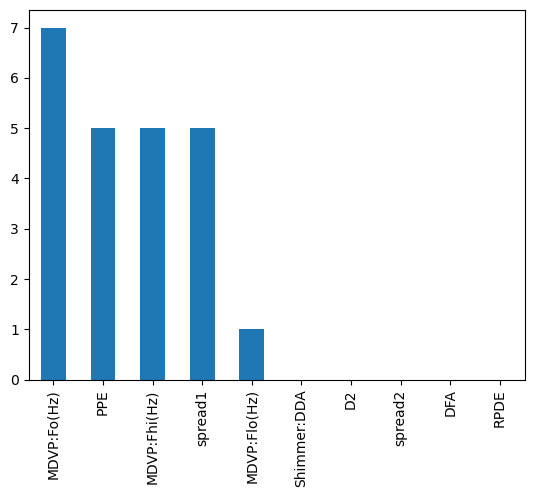

In [16]:
data.isnull().sum().sort_values(ascending=False).head(10).plot(kind='bar')

In [17]:
data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,NaN,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.33559,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,NaN,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,missing,2.405554,0.368975
4,phon_R01_S01_5,NaN,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [18]:
data.describe()

,MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,...,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,D2,PPE
count,192.000000,196.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.00000,197.000000,...,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,192.000000,197.000000,192.000000
mean,197.387422,116.311847,0.006260,0.000044,0.003324,0.003486,0.009973,0.029985,0.28501,0.015804,...,0.024241,0.047413,0.024759,21.865487,0.756345,0.497983,0.719158,-5.671404,2.382158,-0.315374
std,91.926596,43.410045,0.004839,0.000035,0.002958,0.002774,0.008874,0.018963,0.19593,0.010198,...,0.016938,0.030593,0.040222,4.408504,0.430381,0.103564,0.056043,1.100585,0.380925,7.232355
min,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.08500,0.004550,...,0.007190,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,1.423287,-100.000000
25%,134.965750,84.400500,0.003460,0.000020,0.001660,0.001860,0.004990,0.016570,0.14900,0.008290,...,0.013090,0.024870,0.005950,19.196000,1.000000,0.422229,0.674953,-6.449115,2.103014,0.134962
50%,174.402000,104.376000,0.004950,0.000030,0.002500,0.002700,0.007500,0.023080,0.22100,0.012840,...,0.018310,0.038510,0.011700,22.066000,1.000000,0.491345,0.722356,-5.716036,2.361532,0.193985
75%,224.093750,139.504250,0.007420,0.000060,0.003880,0.003980,0.011640,0.038520,0.36100,0.020550,...,0.029710,0.061650,0.025290,25.032000,1.000000,0.585169,0.762726,-4.998968,2.634633,0.252080
max,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.30200,0.056470,...,0.137780,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,3.671155,0.527367


In [19]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
192    False
193    False
194    False
196    False
197    False
Length: 197, dtype: bool

In [20]:
data.replace([9999, 'Error'], np.nan, inplace=True)
print(data.head())

             name MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1     119.992       157.302        74.997         0.00784   
1  phon_R01_S01_2         NaN       148.650       113.819         0.00968   
2  phon_R01_S01_3     116.682       131.111           NaN         0.01050   
3  phon_R01_S01_4     116.676       137.871       111.366         0.00997   
4  phon_R01_S01_5         NaN       141.781       110.655         0.01284   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
0           0.00007   0.00370   0.00554     0.01109       0.04374  ...   
1           0.00008   0.00465   0.00696     0.01394       0.06134  ...   
2           0.00009   0.00544   0.00781     0.01633       0.05233  ...   
3           0.00009   0.00502   0.00698     0.01505       0.05492  ...   
4           0.00011   0.00655   0.00908     0.01966       0.06425  ...   

   Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spread1  \
0      0.06545  0.0

In [21]:
data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,NaN,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.33559,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,NaN,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,missing,2.405554,0.368975
4,phon_R01_S01_5,NaN,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [22]:
data2 = data.fillna({'MDVP:Fo(Hz)':0.0,'MDVP:Fhi(Hz)':1.0,'MDVP:Flo(Hz)':1.1,'spread1':0.0,'PPE':1.0})
data2.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,0.0,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.33559,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,1.100,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,missing,2.405554,0.368975
4,phon_R01_S01_5,0.0,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [23]:
numeric_data = data.select_dtypes(include=['number'])
avarge = numeric_data.mean(axis=0)

In [24]:
data2=numeric_data.fillna(avarge)

In [25]:
data2.head()

,MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,...,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,D2,PPE
0,157.302,74.997000,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,...,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,2.301442,0.284654
1,148.650,113.819000,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,...,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,2.486855,0.368674
2,131.111,116.311847,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,...,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,2.342259,0.332634
3,137.871,111.366000,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,...,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,2.405554,0.368975
4,141.781,110.655000,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,...,0.04465,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,2.332180,0.410335


In [26]:
catogrorical_data=data['name']

In [27]:
catogrorical_data.unique()

array(['phon_R01_S01_1', 'phon_R01_S01_2', 'phon_R01_S01_3',
       'phon_R01_S01_4', 'phon_R01_S01_5', 'phon_R01_S01_6',
       'phon_R01_S02_1', 'phon_R01_S02_2', 'phon_R01_S02_3',
       'phon_R01_S02_4', 'phon_R01_S02_5', 'phon_R01_S02_6',
       'phon_R01_S04_1', 'phon_R01_S04_2', 'phon_R01_S04_3',
       'phon_R01_S04_4', 'phon_R01_S04_5', 'phon_R01_S04_6',
       'phon_R01_S05_1', 'phon_R01_S05_2', 'phon_R01_S05_3',
       'phon_R01_S05_4', 'phon_R01_S05_5', 'phon_R01_S05_6',
       'phon_R01_S06_1', 'phon_R01_S06_2', 'phon_R01_S06_3',
       'phon_R01_S06_4', 'phon_R01_S06_5', 'phon_R01_S06_6',
       'phon_R01_S07_1', 'phon_R01_S07_2', 'phon_R01_S07_3',
       'phon_R01_S07_4', 'phon_R01_S07_5', 'phon_R01_S07_6',
       'phon_R01_S08_1', 'phon_R01_S08_2', 'phon_R01_S08_3',
       'phon_R01_S08_4', 'phon_R01_S08_5', 'phon_R01_S08_6',
       'phon_R01_S10_1', 'phon_R01_S10_2', 'phon_R01_S10_3',
       'phon_R01_S10_4', 'phon_R01_S10_5', 'phon_R01_S10_6',
       'phon_R01_S13_1',

In [28]:
most_frquent=catogrorical_data.mode()[0]

In [29]:
catogrorical_data.describe()

count                197
unique               195
top       phon_R01_S01_2
freq                   2
Name: name, dtype: object

In [30]:
catogrorical_data1=catogrorical_data.fillna(most_frquent)

In [31]:
catogrorical_data1.unique()

array(['phon_R01_S01_1', 'phon_R01_S01_2', 'phon_R01_S01_3',
       'phon_R01_S01_4', 'phon_R01_S01_5', 'phon_R01_S01_6',
       'phon_R01_S02_1', 'phon_R01_S02_2', 'phon_R01_S02_3',
       'phon_R01_S02_4', 'phon_R01_S02_5', 'phon_R01_S02_6',
       'phon_R01_S04_1', 'phon_R01_S04_2', 'phon_R01_S04_3',
       'phon_R01_S04_4', 'phon_R01_S04_5', 'phon_R01_S04_6',
       'phon_R01_S05_1', 'phon_R01_S05_2', 'phon_R01_S05_3',
       'phon_R01_S05_4', 'phon_R01_S05_5', 'phon_R01_S05_6',
       'phon_R01_S06_1', 'phon_R01_S06_2', 'phon_R01_S06_3',
       'phon_R01_S06_4', 'phon_R01_S06_5', 'phon_R01_S06_6',
       'phon_R01_S07_1', 'phon_R01_S07_2', 'phon_R01_S07_3',
       'phon_R01_S07_4', 'phon_R01_S07_5', 'phon_R01_S07_6',
       'phon_R01_S08_1', 'phon_R01_S08_2', 'phon_R01_S08_3',
       'phon_R01_S08_4', 'phon_R01_S08_5', 'phon_R01_S08_6',
       'phon_R01_S10_1', 'phon_R01_S10_2', 'phon_R01_S10_3',
       'phon_R01_S10_4', 'phon_R01_S10_5', 'phon_R01_S10_6',
       'phon_R01_S13_1',

In [32]:
catogrorical_data1=pd.get_dummies(catogrorical_data1).astype(int)
catogrorical_data1

,phon_R01_S01_1,phon_R01_S01_2,phon_R01_S01_3,phon_R01_S01_4,phon_R01_S01_5,phon_R01_S01_6,phon_R01_S02_1,phon_R01_S02_2,phon_R01_S02_3,phon_R01_S02_4,...,phon_R01_S49_3,phon_R01_S49_4,phon_R01_S49_5,phon_R01_S49_6,phon_R01_S50_1,phon_R01_S50_2,phon_R01_S50_3,phon_R01_S50_4,phon_R01_S50_5,phon_R01_S50_6
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
193,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
194,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
196,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
merged_data=pd.concat([data2,catogrorical_data1],axis=1)
final_merged=pd.concat([merged_data,data],axis=1)
print(final_merged.columns)
print(type(final_merged))

Index(['MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)',
       'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP', 'MDVP:Shimmer',
       'MDVP:Shimmer(dB)', 'Shimmer:APQ3',
       ...
       'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA', 'spread1',
       'spread2', 'D2', 'PPE'],
      dtype='object', length=240)
<class 'pandas.core.frame.DataFrame'>


In [34]:
final_merged.head()

,MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,157.302,74.997000,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,148.650,113.819000,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.33559,2.486855,0.368674
2,131.111,116.311847,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,137.871,111.366000,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,missing,2.405554,0.368975
4,141.781,110.655000,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [35]:
correlation = data2.corr()['status'].abs()

In [36]:
important_cols = correlation[correlation > 0.3]
important_cols

MDVP:Flo(Hz)        0.379737
MDVP:Jitter(Abs)    0.342482
MDVP:Shimmer        0.371169
MDVP:Shimmer(dB)    0.354468
Shimmer:APQ3        0.351573
Shimmer:APQ5        0.354881
MDVP:APQ            0.367389
Shimmer:DDA         0.351565
HNR                 0.363121
status              1.000000
RPDE                0.304563
spread1             0.557517
D2                  0.340090
Name: status, dtype: float64

In [37]:
#delete unimportant columns
final_data = data2.drop(columns=correlation[correlation < 0.1].index)

In [38]:
final_data.columns.tolist()

['MDVP:Fhi(Hz)',
 'MDVP:Flo(Hz)',
 'MDVP:Jitter(%)',
 'MDVP:Jitter(Abs)',
 'MDVP:RAP',
 'MDVP:PPQ',
 'Jitter:DDP',
 'MDVP:Shimmer',
 'MDVP:Shimmer(dB)',
 'Shimmer:APQ3',
 'Shimmer:APQ5',
 'MDVP:APQ',
 'Shimmer:DDA',
 'NHR',
 'HNR',
 'status',
 'RPDE',
 'DFA',
 'spread1',
 'D2']

In [39]:
final_data.head()

,MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,D2
0,157.302,74.997000,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,2.301442
1,148.650,113.819000,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,2.486855
2,131.111,116.311847,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,2.342259
3,137.871,111.366000,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,2.405554
4,141.781,110.655000,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,2.332180


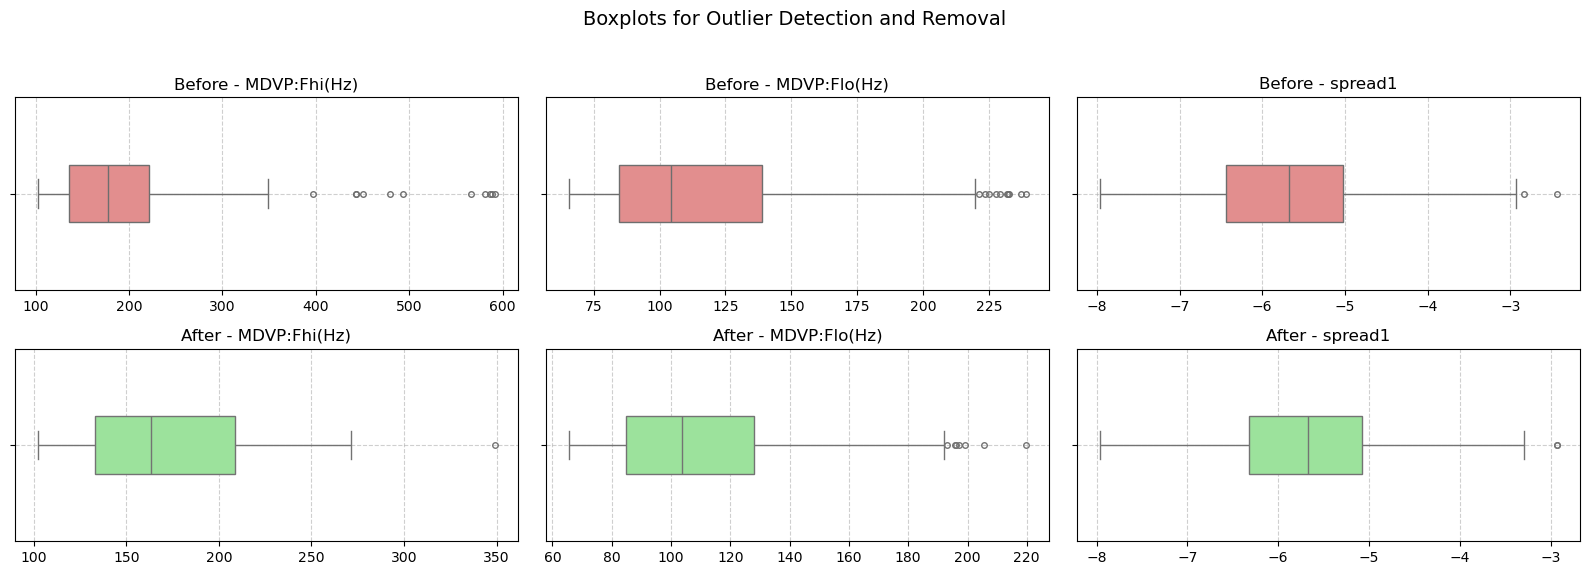

In [40]:

columns = ["MDVP:Fo(Hz)", "MDVP:Fhi(Hz)", "MDVP:Flo(Hz)", "PPE", "spread1"]


available_columns = [col for col in columns if col in final_data.columns]

# Before
plt.figure(figsize=(16, 6))
for i, col in enumerate(available_columns, 1):
    plt.subplot(2, len(available_columns), i)
    sns.boxplot(x=final_data[col], color='lightcoral', width=0.3, fliersize=4)  # قبل إزالة القيم المتطرفة
    plt.title(f'Before - {col}', fontsize=12)
    plt.xlabel("")
    plt.grid(True, linestyle='--', alpha=0.6)

# IQR
Q1 = final_data[available_columns].quantile(0.25)
Q3 = final_data[available_columns].quantile(0.75)
IQR = Q3 - Q1

final_data_no_outliers = final_data[~((final_data[available_columns] < (Q1 - 1.5 * IQR)) | (final_data[available_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]

# after
for i, col in enumerate(available_columns, 1):
    plt.subplot(2, len(available_columns), i + len(available_columns))
    sns.boxplot(x=final_data_no_outliers[col], color='lightgreen', width=0.3, fliersize=4)
    plt.title(f'After - {col}', fontsize=12)
    plt.xlabel("")
    plt.grid(True, linestyle='--', alpha=0.6)

# title
plt.suptitle("Boxplots for Outlier Detection and Removal", fontsize=14)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()



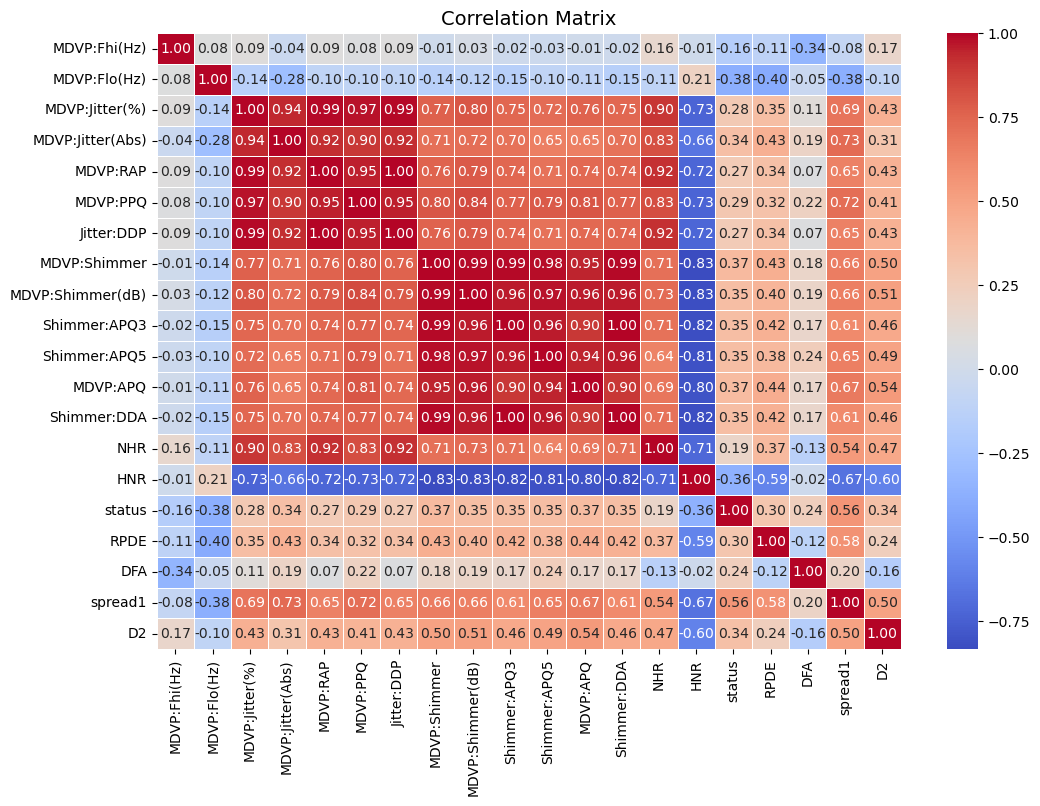

In [41]:
corr_matrix = final_data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix", fontsize=14)
plt.show()


In [42]:
X=final_data.drop('status',axis=1)
y=final_data['status']

In [43]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [44]:
#fetures 
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Logistic Regression

In [46]:
#training
log_model = LogisticRegression()
log_model.fit(x_train_scaled, y_train)

LogisticRegression()

In [47]:
y_pred = log_model.predict(x_test_scaled)


In [48]:
print("Acuuracy:", accuracy_score(y_test, y_pred))
print("\nClassification_Report\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Acuuracy: 0.875

Classification_Report
               precision    recall  f1-score   support

           0       1.00      0.44      0.62         9
           1       0.86      1.00      0.93        31

    accuracy                           0.88        40
   macro avg       0.93      0.72      0.77        40
weighted avg       0.89      0.88      0.86        40

Confusion Matrix:
 [[ 4  5]
 [ 0 31]]


# KNN

In [50]:

knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(x_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

In [51]:
y_pred_knn = knn_model.predict(x_test_scaled)


In [52]:
print("\n--- KNN Results ---")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("Cross-Validated Accuracy:", cross_val_score(knn_model, x_train_scaled, y_train, cv=5).mean())


--- KNN Results ---
Accuracy: 0.9

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.78      0.78         9
           1       0.94      0.94      0.94        31

    accuracy                           0.90        40
   macro avg       0.86      0.86      0.86        40
weighted avg       0.90      0.90      0.90        40

Confusion Matrix:
 [[ 7  2]
 [ 2 29]]
Cross-Validated Accuracy: 0.8790322580645162


In [161]:
# Try different numbers of clusters and find the best using silhouette score
range_n_clusters = range(2, 11)
best_score = -1
best_k = 2

for k in range_n_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    score = silhouette_score(X, cluster_labels)
    print(f"Number of Clusters = {k}, Silhouette Score = {score:.3f}")
    
    if score > best_score:
        best_score = score
        best_k = k

print(f"Best Number of Clusters: {best_k} with Silhouette Score = {best_score:.3f}")


C:\Users\ahmed\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ahmed\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ahmed\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Number of Clusters = 2, Silhouette Score = 0.748
Number of Clusters = 3, Silhouette Score = 0.493
Number of Clusters = 4, Silhouette Score = 0.494
Number of Clusters = 5, Silhouette Score = 0.556


C:\Users\ahmed\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ahmed\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ahmed\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ahmed\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

Number of Clusters = 6, Silhouette Score = 0.534
Number of Clusters = 7, Silhouette Score = 0.513
Number of Clusters = 8, Silhouette Score = 0.496
Number of Clusters = 9, Silhouette Score = 0.522
Number of Clusters = 10, Silhouette Score = 0.528
Best Number of Clusters: 2 with Silhouette Score = 0.748


C:\Users\ahmed\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ahmed\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [156]:
# Define the parameter grid
param_grid = {
    'C': [0.01, 0.1, 1.0, 10],
    'solver': ['liblinear', 'saga', 'sag', 'lbfgs'],
    'penalty': ['l2']
}

# Initialize the model
logistic_model = LogisticRegression(max_iter=1000, random_state=33)

# GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(logistic_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Print training info
print("Best Parameters:", grid_search.best_params_)
print("Train Accuracy:", best_model.score(x_train, y_train))
print("Test Accuracy:", best_model.score(x_test, y_test))
print("Classes:", best_model.classes_)
print("Number of Iterations:", best_model.n_iter_)
print('---------------------')

# Predictions
y_pred = best_model.predict(x_test)
y_pred_prob = best_model.predict_proba(x_test)

print("First 10 Predictions:", y_pred[:10])
print("First 10 Prediction Probabilities:\n", y_pred_prob[:10])
print('---------------------')

# Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Cross-validation on training data
cv_scores = cross_val_score(best_model, x_train, y_train, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())


C:\Users\ahmed\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ahmed\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ahmed\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ahmed\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ahmed\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ahmed\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

Best Parameters: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
Train Accuracy: 0.8598726114649682
Test Accuracy: 0.9
Classes: [0 1]
Number of Iterations: [235]
---------------------
First 10 Predictions: [1 1 1 1 1 0 1 1 1 0]
First 10 Prediction Probabilities:
 [[0.01983097 0.98016903]
 [0.24761646 0.75238354]
 [0.21499378 0.78500622]
 [0.08857381 0.91142619]
 [0.00196767 0.99803233]
 [0.77958147 0.22041853]
 [0.22322979 0.77677021]
 [0.01324062 0.98675938]
 [0.00207902 0.99792098]
 [0.91520415 0.08479585]]
---------------------
Confusion Matrix:
 [[ 5  4]
 [ 0 31]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.56      0.71         9
           1       0.89      1.00      0.94        31

    accuracy                           0.90        40
   macro avg       0.94      0.78      0.83        40
weighted avg       0.91      0.90      0.89        40

Cross-Validation Scores: [0.875      0.84375    0.87096774 0.80645161 0.838